# 09 Final Calculations and Visualizations

    01 Import Data
    02 Consider security implications
    03 Compare spending habits
    04 Drop customers with less than 5 orders
    05 Create customer profiles
    06 Max, mean, and min calculations for customer-profiles
    07 Visualizations
    

In [1]:
# import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy

## 01 Import Data


In [2]:
# import data
path = r'C:\Users\Lenovo\OneDrive\Dokumente\CareerFoundry\Data Immersion\4. Python Fundamentals for Data Analysts\Instacart Basket Analysis - Kopie'
df = pd.read_pickle(os.path.join(path,'02 Data', 'Prepared Data', 'ords_prods_customers_reduced_size.pkl'))

## 02 Consider security implications 

In [3]:
# checking columns
df.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'new_customer',
       'add_to_cart_order', 'reordered', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_hours', 'max_order', 'loyalty_flag',
       'mean_price', 'spendings', 'frequency_median', 'order_frequency',
       'first_name', 'last_name', 'gender', 'state', 'age', 'date_joined',
       'n_dependants', 'fam_status', 'income'],
      dtype='object')

#### First name and last name is PII data and not necessary for our calculations.

In [4]:
# dropping columns 'first_name' and 'last_name' in the dataframe
df=df.drop(columns = ['first_name', 'last_name'])

## 03 Compare spending habits

    creating a new column: 'region'
    comparing spending habits by 'region'

### creating a new column: 'region'

In [5]:
# creating a regional list
region = []

for value in df['state']:
    if value in ('Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 
                 'Pennsylvania', 'New Jersey'):
        region.append('Northeast')
    elif value in ('Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota' , 'South Dakota', 'Nebraska', 
                   'Kansas', 'Minnesota', 'Iowa', 'Missouri'):
        region.append('Midwest')
    elif value in ('Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 
                   'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 
                   'Oklahoma', 'Texas', 'Arkansas', 'Louisiana'):
        region.append('South')
    elif value in ('Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 
                   'Washington', 'Oregon', 'California', 'Hawaii'):
        region.append('West')
    else:
        region.append('Unknown')
        

In [6]:
# creating a new column region
df['region'] = region



In [7]:
# checking value_counts for region
df['region'].value_counts(dropna = False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

 ### comparing spending habits by 'region'

In [8]:
# creating a pivot with number of high/low spenders for each region
df_spender = df.pivot_table(index='region', columns='spendings', values='order_number', aggfunc='count', fill_value=0)

In [9]:
# checking pivot
df_spender

spendings,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


In [10]:
# Show the average price for each region.

df_prices_avg=df.groupby('region')['prices'].mean()
df_prices_avg

region
Midwest      12.715483
Northeast    11.554997
South        12.195577
West         11.319834
Name: prices, dtype: float32

In [11]:
# Show the total amount spent by all customers for each region.

df_prices=df.groupby('region')['prices'].sum()
df_prices

region
Midwest       96603656.0
Northeast     66126200.0
South        131613264.0
West          93874400.0
Name: prices, dtype: float32

In [12]:
# calculating the number of customers in each region 
customers=df.groupby('region')['user_id'].count()
customers

region
Midwest       7597325
Northeast     5722736
South        10791885
West          8292913
Name: user_id, dtype: int64

#### normalization

In [13]:
# dividing number of customers/100 in each region by number of high and low spenders

spender_norm = df_spender.div(customers/100, axis=0)

In [14]:
# show result
spender_norm

spendings,High spender,Low spender
region,,
Midwest,2.053025,97.946975
Northeast,1.891141,98.108859
South,1.943043,98.056957
West,1.933627,98.066373


#### the share of high spenders varies between 1.89% and 2.05 % across the different regions

In [15]:
prices_norm = df_prices.div(customers, axis=0)
prices_norm

region
Midwest      12.715483
Northeast    11.554997
South        12.195577
West         11.319834
dtype: float64

## 04 Drop customers with less than 5 orders

In [16]:
# Creating an exclusion flag

df['exclusion_flag'] = np.where(df['max_order'] < 5, 'Yes', 'No')

In [17]:
# checking value_counts of new column
df['exclusion_flag'].value_counts()

exclusion_flag
No     30964564
Yes     1440295
Name: count, dtype: int64

In [18]:
# Creating a data frame with customers with less than 5 orders

df_no_orders = df[df['exclusion_flag'] == 'Yes']

In [19]:
# Exporting dataframe with customers with less than 5 orders  

df_no_orders.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'under_five_orders.pkl'))

In [20]:
# Removing the data of customers with less than 5 orders from the main dataframe

df = df[df['exclusion_flag'] != 'Yes']

## 05 Create customer profiles

    Creating flags for dependants, age and income
    Creating Customer Profiles
    Checking customer profiles

### Creating flags for dependants, age and income

##### dependants_flag

In [21]:
# checking value_counts for n_dependants
df['n_dependants'].value_counts()

n_dependants
3    7772516
0    7739681
2    7733261
1    7719106
Name: count, dtype: int64

In [22]:
# defining no dependants for dependants_flag
df.loc[df['n_dependants'] == 0 , 'dependants_flag'] = 'no dependants'

In [23]:
# defining has dependants for dependants_flag
df.loc[df['n_dependants'] > 0 , 'dependants_flag'] = 'has dependants'

In [24]:
df['dependants_flag'].value_counts()

dependants_flag
has dependants    23224883
no dependants      7739681
Name: count, dtype: int64

##### creating an age_flag (Young/Middle/Old)

<Axes: xlabel='age', ylabel='Count'>

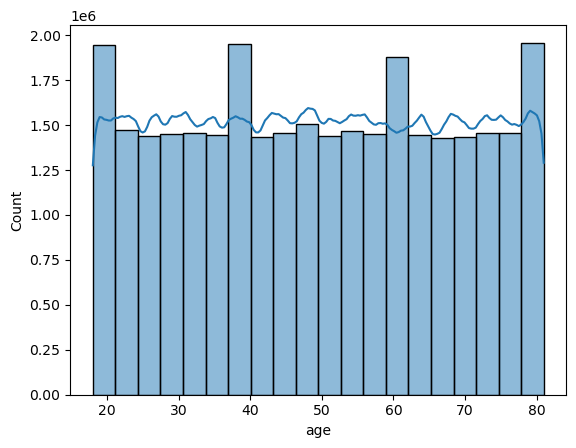

In [25]:
# checking 
sns.histplot(df['age'], bins = 20, kde = True)

In [26]:
# defining middle in 'age_flag'
df.loc[(df['age'] >40 & (df['age'] <=59)), 'age_flag'] = 'middle (40-59)'


In [27]:
# defining young in 'age_flag'

df.loc[df['age'] <=39, 'age_flag'] = 'young (18-39)'

In [28]:
# defining old in 'age_flag'
df.loc[df['age'] >=60, 'age_flag'] = 'old (60+)'

In [29]:
df['age_flag'].value_counts(dropna=False)

age_flag
young (18-39)     10665110
old (60+)         10574504
middle (40-59)     9724950
Name: count, dtype: int64

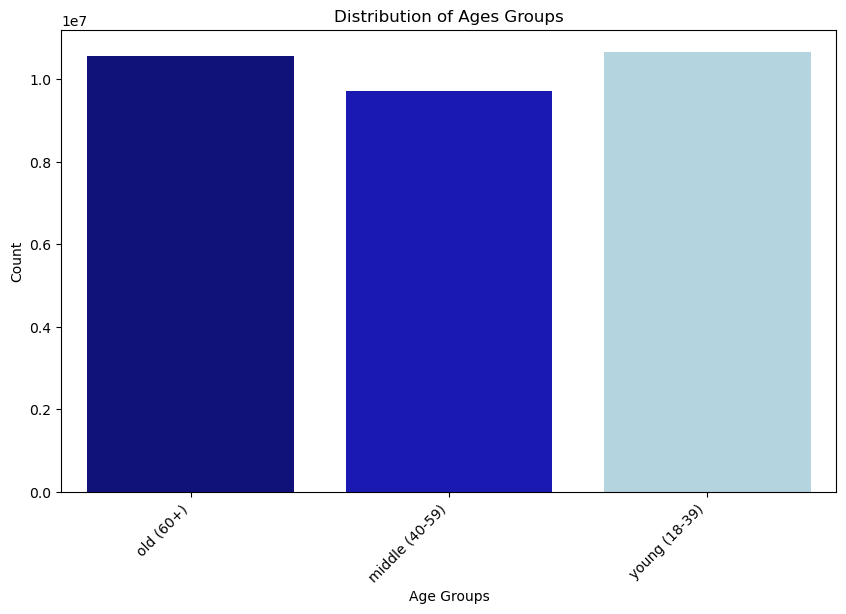

In [30]:

# Define a dictionary to map each age group to a specific color
profile_colors = {
    'young (18-39)': 'lightblue',
    'middle (40-59)': 'mediumblue',
    'old (60+)': 'darkblue',
}

# Display the counts above in a bar chart
# Bar charts that show income type distributions by region

plt.figure(figsize=(10, 6))
barplot1 = sns.countplot(data=df, x='age_flag', palette=profile_colors)

plt.title('Distribution of Ages Groups')
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [31]:
# Export the barplot

barplot1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Distribution_of_Age_Groups.png'), bbox_inches='tight')

##### creating an income_flag (low income/middle_income/high_income)

In [32]:
# creating income label

income_label = ['low_income', 'middle_income', 'high_income']

In [33]:
# creating income groups with income_flag

df['income_flag'] = np.select([(df['income'] >= 1) & (df['income'] < 70000), (df['income'] >= 70000) & (df['income'] < 120000), df['income'] >= 120000],
    income_label,
    default=np.nan)

In [34]:
# running checks with income_flag
df['income_flag'].value_counts()

income_flag
middle_income    13264248
high_income       9179783
low_income        8520533
Name: count, dtype: int64

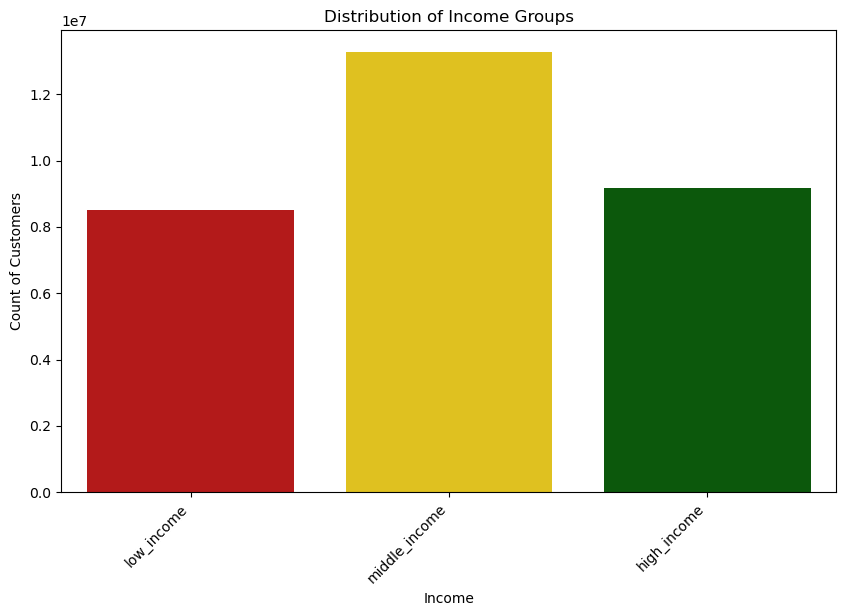

In [106]:
# Define the desired order for income groups
income_order = ['low_income', 'middle_income', 'high_income']

# Define the color palette for each income group
palette = {'low_income': '#CD0000', 'middle_income': '#FFD700', 'high_income': '#006400'}

# Display the counts above in a bar chart with custom colors
plt.figure(figsize=(10, 6))
barplot2 = sns.countplot(data=df, x='income_flag', order=income_order, palette=palette)

plt.title('Distribution of Income Groups')
plt.xlabel('Income')
plt.ylabel('Count of Customers')
plt.xticks(rotation=45, ha='right')
plt.show()

In [107]:
# Export the barplot

barplot2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Distribution_of_Income_Groups.png'), bbox_inches='tight')

In [37]:
# checking 'sum of prices' by income

df.groupby('income_flag')['prices'].sum()

income_flag
high_income      184026288.0
low_income        62770456.0
middle_income    122719528.0
Name: prices, dtype: float32

In [38]:
# checking average'prices' by income

df.groupby('income_flag')['prices'].mean()

income_flag
high_income      20.046911
low_income        7.366963
middle_income     9.251903
Name: prices, dtype: float32

In [39]:
# checking 'days_since_prior_order' by income

df.groupby('income_flag')['days_since_prior_order'].mean()

income_flag
high_income      10.759912
low_income       10.935595
middle_income    10.764841
Name: days_since_prior_order, dtype: float32

In [40]:
# checking 'order_hour_of_day' by income

df.groupby('income_flag')['order_hour_of_day'].value_counts()

income_flag    order_hour_of_day
high_income    10.0                 771285
               14.0                 763047
               11.0                 762537
               15.0                 756137
               13.0                 752592
                                     ...  
middle_income  1.0                   48949
               5.0                   36961
               2.0                   27036
               4.0                   21600
               3.0                   20807
Name: count, Length: 72, dtype: int64

### Creating Customer Profiles

In [41]:
# Create a profile tag for no dependants, low income and young

df.loc[(df['dependants_flag'] == 'no dependants') & (df['income_flag'] == 'low_income') & (df['age_flag'] == 'young (18-39)'), 'customer_profile'] = 'no_low_young'

In [42]:
# Create a profile tag for has dependants, medium income and young
df.loc[(df['dependants_flag'] == 'has dependants') & (df['income_flag'] == 'low_income') & (df['age_flag'] == 'young (18-39)'), 'customer_profile'] = 'has_low_young'

In [43]:
# Create a profile tag for no dependants, medium income and young
df.loc[(df['dependants_flag'] == 'no dependants') & (df['income_flag'] == 'middle_income') & (df['age_flag'] == 'young (18-39)'), 'customer_profile'] = 'no_middle_young'

In [44]:
# Create a profile tag for has dependants, medium income and young
df.loc[(df['dependants_flag'] == 'has dependants') & (df['income_flag'] == 'middle_income') & (df['age_flag'] == 'young (18-39)'), 'customer_profile'] = 'has_middle_young'

In [45]:
# Create a profile tag for no dependants, high income and young
df.loc[(df['dependants_flag'] == 'no dependants') & (df['income_flag'] == 'high_income') & (df['age_flag'] == 'young (18-39)'), 'customer_profile'] = 'no_high_young'

In [46]:
# Create a profile tag for has dependants, high income and young

df.loc[(df['dependants_flag'] == 'has dependants') & (df['income_flag'] == 'high_income') & (df['age_flag'] == 'young (18-39)'), 'customer_profile'] = 'has_high_young'

In [47]:
# Create a profile tag for no dependants, low income and middle

df.loc[(df['dependants_flag'] == 'no dependants') & (df['income_flag'] == 'low_income') & (df['age_flag'] == 'middle (40-59)'), 'customer_profile'] = 'no_low_middle'

In [48]:
# Create a profile tag for has dependants, low income and middle

df.loc[(df['dependants_flag'] == 'has dependants') & (df['income_flag'] == 'low_income') & (df['age_flag'] == 'middle (40-59)'), 'customer_profile'] = 'has_low_middle'

In [49]:
# Create a profile tag for no dependants, medium income and middle

df.loc[(df['dependants_flag'] == 'no dependants') & (df['income_flag'] == 'middle_income') & (df['age_flag'] == 'middle (40-59)'), 'customer_profile'] = 'no_middle_middle'

In [50]:
# Create a profile tag for has dependants, medium income and middle

df.loc[(df['dependants_flag'] == 'has dependants') & (df['income_flag'] == 'middle_income') & (df['age_flag'] == 'middle (40-59)'), 'customer_profile'] = 'has_middle_middle'

In [51]:
# Create a profile tag for no dependants, high income and middle

df.loc[(df['dependants_flag'] == 'no dependants') & (df['income_flag'] == 'high_income') & (df['age_flag'] == 'middle (40-59)'), 'customer_profile'] = 'no_high_middle'

In [52]:
# Create a profile tag for has dependants, high income and middle

df.loc[(df['dependants_flag'] == 'has dependants') & (df['income_flag'] == 'high_income') & (df['age_flag'] == 'middle (40-59)'), 'customer_profile'] = 'has_high_middle'

In [53]:
# Create a profile tag for no dependants, low income and old

df.loc[(df['dependants_flag'] == 'no dependants') & (df['income_flag'] == 'low_income') & (df['age_flag'] == 'old (60+)'), 'customer_profile'] = 'no_low_old'

In [54]:
# Create a profile tag for has dependants, low income and old

df.loc[(df['dependants_flag'] == 'has dependants') & (df['income_flag'] == 'low_income') & (df['age_flag'] == 'old (60+)'), 'customer_profile'] = 'has_low_old'

In [55]:
# Create a profile tag for no dependants, medium income and old

df.loc[(df['dependants_flag'] == 'no dependants') & (df['income_flag'] == 'middle_income') & (df['age_flag'] == 'old (60+)'), 'customer_profile'] = 'no_middle_old'

In [56]:
# Create a profile tag for has dependants, medium income and old

df.loc[(df['dependants_flag'] == 'has dependants') & (df['income_flag'] == 'middle_income') & (df['age_flag'] == 'old (60+)'), 'customer_profile'] = 'has_middle_old'

In [57]:
# Create a profile tag for no dependants, high income and old

df.loc[(df['dependants_flag'] == 'no dependants') & (df['income_flag'] == 'high_income') & (df['age_flag'] == 'old (60+)'), 'customer_profile'] = 'no_high_old'

In [58]:
# Create a profile tag for has dependants, high income and old

df.loc[(df['dependants_flag'] == 'has dependants') & (df['income_flag'] == 'high_income') & (df['age_flag'] == 'old (60+)'), 'customer_profile'] = 'has_high_old'

In [59]:
# Check the count of each tag

df['customer_profile'].value_counts(dropna = False)

customer_profile
has_low_young        4125124
has_middle_young     3778671
has_high_old         3604777
has_middle_old       3226369
has_high_middle      3152760
has_middle_middle    2972854
no_low_young         1398782
no_middle_young      1232634
no_high_old          1213074
has_low_middle       1165501
has_low_old          1098087
no_middle_old        1080141
no_high_middle       1079273
no_middle_middle      973579
no_low_middle         380983
no_low_old            352056
has_high_young        100740
no_high_young          29159
Name: count, dtype: int64

##### Assigning colors

In [60]:
# Define a color mapping for each customer profile with hex codes
profile_colors = {
    
'has_high_old': '#006400',
    'has_middle_old': '#ccac00',
    'has_low_old': '#8B0000',
    'no_high_old': '#006400',
    'no_middle_old': '#ccac00',
    'no_low_old': '#8B0000',
    'has_high_middle': '#228B22',
    'has_middle_middle': '#FFC125',
    'has_low_middle': '#CD0000',
    'no_high_middle': '#228B22',
    'no_middle_middle': '#FFC125',
    'no_low_middle': '#CD0000',
    'has_high_young': '#32CD32',
    'has_middle_young': '#FFD700',
    'has_low_young': '#EE0000',
    'no_high_young': '#32CD32',
    'no_middle_young': '#FFD700',
    'no_low_young': '#EE0000'}

# Apply the colors to the customer_profile column
df['profile_colors'] = df['customer_profile'].map(profile_colors)

### Checking customer profiles

##### value_counts

In [61]:
# Print unique values and colors in the 'profile_colors' column
unique_profile_colors = df[['customer_profile', 'profile_colors']].drop_duplicates()

for index, row in unique_profile_colors.iterrows():
    print(f"Customer Profile: {row['customer_profile']}, Color: {row['profile_colors']}")

Customer Profile: has_low_old, Color: #8B0000
Customer Profile: has_high_old, Color: #006400
Customer Profile: has_low_middle, Color: #CD0000
Customer Profile: has_low_young, Color: #EE0000
Customer Profile: no_low_old, Color: #8B0000
Customer Profile: has_middle_young, Color: #FFD700
Customer Profile: no_middle_young, Color: #FFD700
Customer Profile: no_low_young, Color: #EE0000
Customer Profile: no_high_old, Color: #006400
Customer Profile: has_middle_old, Color: #ccac00
Customer Profile: no_middle_middle, Color: #FFC125
Customer Profile: no_high_middle, Color: #228B22
Customer Profile: has_high_middle, Color: #228B22
Customer Profile: no_low_middle, Color: #CD0000
Customer Profile: has_middle_middle, Color: #FFC125
Customer Profile: no_middle_old, Color: #ccac00
Customer Profile: no_high_young, Color: #32CD32
Customer Profile: has_high_young, Color: #32CD32


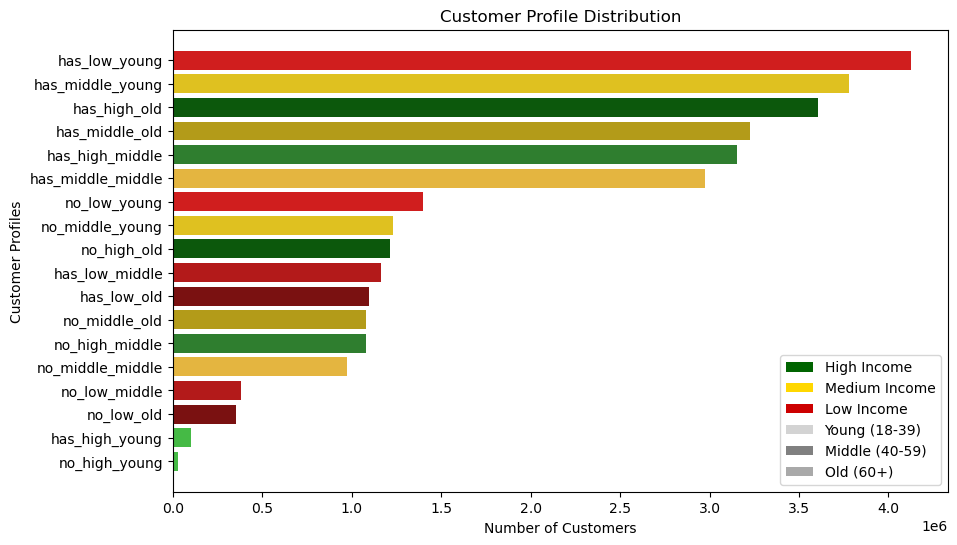

In [62]:

# Create a horizontal bar chart with manually specified colors in descending order
plt.figure(figsize=(10, 6))

# Set the colors directly in the barplot and order by count in descending order
bar_profiles = sns.barplot(
    x=df['customer_profile'].value_counts().sort_values(ascending=False),
    y=df['customer_profile'].value_counts().sort_values(ascending=False).index,
    palette=[profile_colors[profile] for profile in df['customer_profile'].value_counts().sort_values(ascending=False).index]
)

bar_profiles.set(xlabel='Number of Customers', ylabel='Customer Profiles', title='Customer Profile Distribution')

# Add a legend for income levels with custom colors
income_legend_labels = {
    'darkgreen': 'High Income',  
    '#FFD700': 'Medium Income', 
    '#CD0000': 'Low Income'  
}

# Create bars with custom colors for the income legend
for color, label in income_legend_labels.items():
    plt.bar(0, 0, color=color, label=label, linewidth=0)

# Add a legend for age groups with grey tones
age_legend_labels = {
    '#D3D3D3': 'Young (18-39)',
    '#808080': 'Middle (40-59)',
    '#A9A9A9': 'Old (60+)',
}

# Create bars with custom colors for the age legend
for color, label in age_legend_labels.items():
    plt.bar(0, 0, color=color, label=label, linewidth=0)

# Show the legends
plt.legend()
plt.legend()

# Show the plot
plt.show()

In [63]:
# Export the barplot

bar_profiles.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Customer_Profile_Distribution.png'), bbox_inches='tight')

##### prices

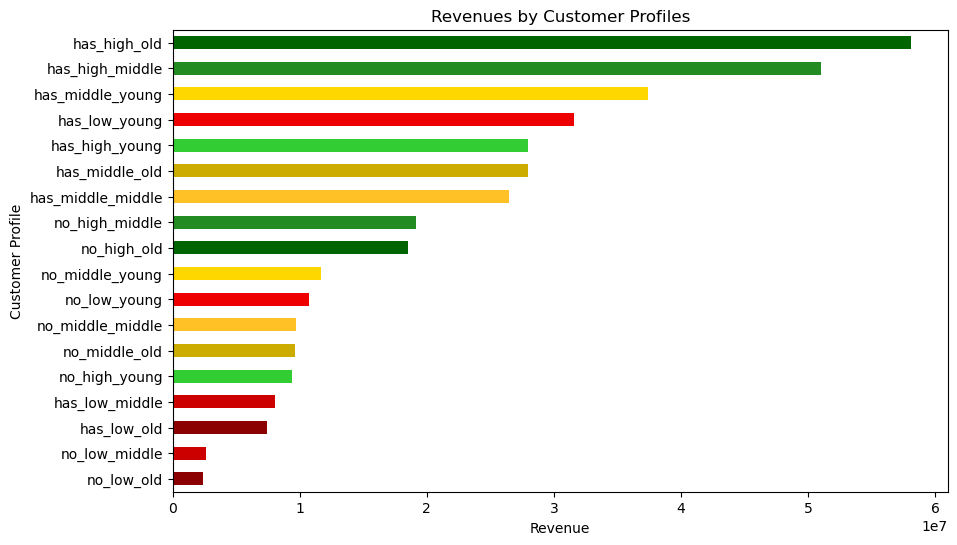

In [64]:
# Create a bar chart showing sum of prices for customer profiles with custom colors (using hex codes)
plt.figure(figsize=(10, 6))
bar_profiles_prices = df.groupby('customer_profile')['prices'].sum().sort_values(ascending=True).plot.barh(color=[
    '#8B0000', '#CD0000', '#8B0000', '#CD0000', '#32CD32', '#ccac00', '#FFC125', '#EE0000', '#FFD700',
    '#006400', '#228B22', '#FFC125', '#ccac00', '#32CD32', '#EE0000', '#FFD700', '#228B22', '#006400'
])
# Add labels and a title
bar_profiles_prices.set(xlabel='Revenue', ylabel='Customer Profile', title='Revenues by Customer Profiles')



# Show the plot
plt.show()


In [65]:
# saving the bar
bar_profiles_prices.figure.savefig(os.path.join(path, '04 Analysis/Visualizations/Revenue_by_Customer_Profiles.png'))

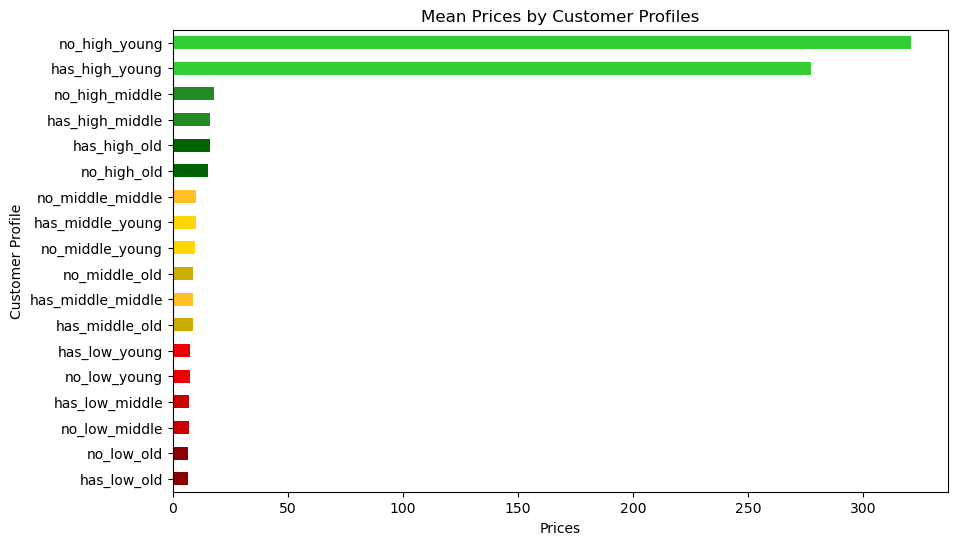

In [66]:
# Create a bar chart showing mean prices for customer profiles with custom colors (using hex codes)
plt.figure(figsize=(10, 6))
bar_profiles_prices_mean = df.groupby('customer_profile')['prices'].mean().sort_values(ascending=True).plot.barh(color=[
'#8B0000', '#8B0000', '#CD0000', '#CD0000', '#EE0000', '#EE0000', '#ccac00', '#FFC125', '#ccac00',
'#FFD700', '#FFD700', '#FFC125', '#006400', '#006400', '#228B22', '#228B22', '#32CD32', '#32CD32'])

# Add labels and a title
bar_profiles_prices_mean.set(xlabel='Prices', ylabel='Customer Profile', title='Mean Prices by Customer Profiles')

# Show the plot
plt.show()


In [67]:
# saving the bar
bar_profiles_prices_mean.figure.savefig(os.path.join(path, '04 Analysis/Visualizations/Mean_Prices_by_Customer_Profiles.png'))

## 06 Max, mean, and min calculations for customer-profiles

    Calculations for prices
    Calculations for frequency
    Calculations for number of orders
    

### Calculations for prices

In [68]:
# View the mean, min, max for customer profiles for prices
df.groupby('customer_profile').agg({'prices': ['mean', 'min', 'max']})

prices              
                         mean  min      max
customer_profile                           
has_high_middle     16.174145  1.0  99999.0
has_high_old        16.113861  1.0  99999.0
has_high_young     277.503998  1.0  99999.0
has_low_middle       6.920393  1.0     25.0
has_low_old          6.786576  1.0     25.0
has_low_young        7.647367  1.0  14900.0
has_middle_middle    8.892622  1.0  99999.0
has_middle_old       8.657994  1.0  99999.0
has_middle_young     9.891066  1.0  99999.0
no_high_middle      17.739685  1.0  99999.0
no_high_old         15.244523  1.0  99999.0
no_high_young      320.716431  1.0  99999.0
no_low_middle        6.899251  1.0     25.0
no_low_old           6.786868  1.0     25.0
no_low_young         7.641140  1.0  14900.0
no_middle_middle     9.954200  1.0  99999.0
no_middle_old        8.910995  1.0  99999.0
no_middle_young      9.457601  1.0  99999.0

### Calculations for frequency 

In [69]:
# View the mean, min, max for customer profiles  for days since prior order

df.groupby('customer_profile').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                    mean  min   max
customer_profile                                   
has_high_middle                10.855887  0.0  30.0
has_high_old                   10.750607  0.0  30.0
has_high_young                 10.437087  0.0  30.0
has_low_middle                 11.105809  0.0  30.0
has_low_old                    11.094747  0.0  30.0
has_low_young                  10.837848  0.0  30.0
has_middle_middle              10.748786  0.0  30.0
has_middle_old                 10.798151  0.0  30.0
has_middle_young               10.732439  0.0  30.0
no_high_middle                 10.647529  0.0  30.0
no_high_old                    10.680534  0.0  30.0
no_high_young                  10.133520  0.0  30.0
no_low_middle                  10.817434  0.0  30.0
no_low_old                     11.131405  0.0  30.0
no_low_young                   10.941046  0.0  30.0
no_middle_middle               10.769814  0.0  30.0
no_middle_old                  10.705191  0.0  30.0
no_middle_young                10.864181  0.0  30.0

### Calculations for number of orders

In [70]:
df.groupby('customer_profile').agg({'order_number': ['mean', 'min', 'max']})

order_number           
                          mean  min   max
customer_profile                         
has_high_middle      17.607012  1.0  99.0
has_high_old         17.904833  1.0  99.0
has_high_young       20.023357  1.0  99.0
has_low_middle       17.065197  1.0  99.0
has_low_old          17.077253  1.0  99.0
has_low_young        17.736784  1.0  99.0
has_middle_middle    18.108404  1.0  99.0
has_middle_old       17.795284  1.0  99.0
has_middle_young     18.025122  1.0  99.0
no_high_middle       18.330973  1.0  99.0
no_high_old          18.394068  1.0  99.0
no_high_young        19.923214  1.0  96.0
no_low_middle        17.803783  1.0  99.0
no_low_old           16.917215  1.0  99.0
no_low_young         17.811966  1.0  99.0
no_middle_middle     18.041435  1.0  99.0
no_middle_old        17.894093  1.0  99.0
no_middle_young      17.656052  1.0  99.0

## 07 Visualizations

    For departments
    For region
    Plots

### For departments

#### Giving the departments names

In [71]:
# Import data from departments.csv

df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'departments.csv'))

In [72]:
# Transform dat
df_dep_t = df_dep.T

In [73]:
# Reset index
df_dep_t.reset_index()

,index,0
0,department_id,department
1,1,frozen
2,2,other
3,3,bakery
4,4,produce
5,5,alcohol
6,6,international
7,7,beverages
8,8,pets
9,9,dry goods pasta


In [74]:
# Defining transformed dataframe without heading
df_dep_t_new = df_dep_t[1:]

In [75]:
df_dep_t_new

,0
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta
10,bulk


In [76]:
# Map department id to department names

department_mapping = {
    1: 'frozen',
    2: 'other',
    3: 'bakery',
    4: 'produce',
    5: 'alcohol',
    6: 'international',
    7: 'beverages',
    8: 'pets',
    9: 'dry goods pasta',
    10: 'bulk',
    11: 'personal care',
    12: 'meat seafood',
    13: 'pantry',
    14: 'breakfast',
    15: 'canned goods',
    16: 'dairy eggs',
    17: 'household',
    18: 'babies',
    19: 'snacks',
    20: 'deli',
    21: 'missing'}

# Create a new column "department" based on the mapping

df['department'] = df['department_id'].map(department_mapping)

#### Visualizations for department

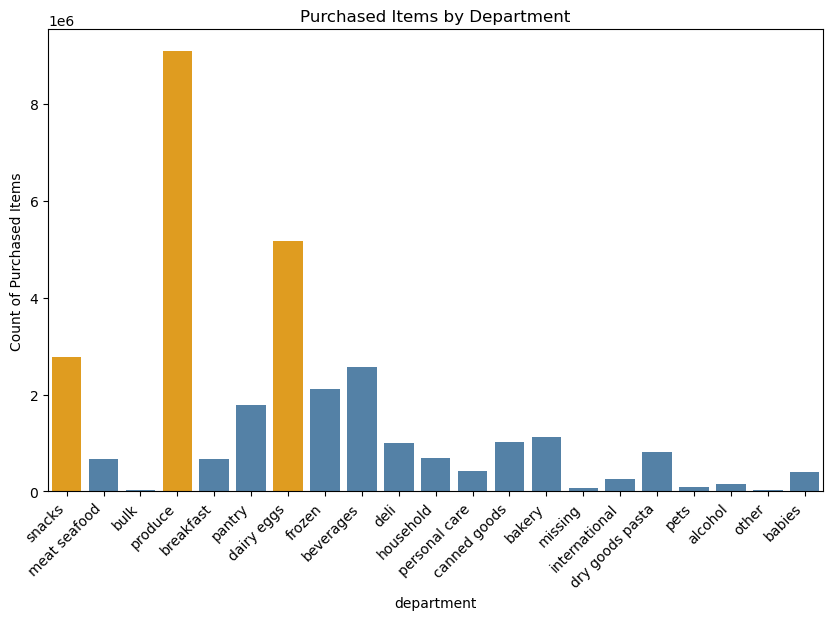

In [77]:
# Display the counts above in a bar chart


# Assuming 'department' is a categorical variable and you want to highlight the top three
top_three_departments = df['department'].value_counts().nlargest(3).index

# Set the color palette with matte blue for all bars and orange for the top three
colors = ['steelblue' if dep not in top_three_departments else 'orange' for dep in df['department'].unique()]
sns.set_palette(colors)

plt.figure(figsize=(10, 6))
bar_department = sns.countplot(data=df, x='department')

plt.title('Purchased Items by Department')
plt.ylabel('Count of Purchased Items')

plt.xticks(rotation=45, ha='right')
plt.show()

In [78]:
# Export the barplot

bar_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Count of Purchased Items by Department.png'))

In [79]:
# Create a crosstab to act as a pivot for analysis

pivot_profiles_dept = pd.crosstab(df['department'], df['customer_profile'], dropna = False)


# View results of crosstab creation

pivot_profiles_dept

customer_profile,has_high_middle,has_high_old,has_high_young,has_low_middle,has_low_old,has_low_young,has_middle_middle,has_middle_old,has_middle_young,no_high_middle,no_high_old,no_high_young,no_low_middle,no_low_old,no_low_young,no_middle_middle,no_middle_old,no_middle_young
department,,,,,,,,,,,,,,,,,,
alcohol,15564,16045,2582,5315,5775,18853,12143,13917,17606,6102,5661,755,1835,1634,6550,4416,4564,5310
babies,43542,50425,1084,11850,9059,51063,42153,44903,52985,15570,16031,188,2975,2922,17302,14108,15398,18834
bakery,116507,134406,4906,38322,34775,146215,108906,117530,137866,40051,45329,1545,11838,11192,50324,36756,39214,45146
beverages,248257,287562,8714,124343,123457,356165,238862,251771,287429,85986,97157,2592,40195,39193,120883,76416,84529,98390
breakfast,65827,75770,2473,30353,29568,93768,61987,65823,78849,22509,25023,686,9770,9162,31570,20714,22405,24593
bulk,3022,3620,11,1665,1578,4651,3182,3550,4172,1046,1186,3,497,378,1498,991,1112,1289
canned goods,109440,123307,3866,29146,26640,130075,100006,110232,128342,36881,39434,1109,9314,8661,44694,33124,36173,41630
dairy eggs,533639,610816,18026,176080,164257,680236,505943,544837,648972,183968,203512,4856,57642,54555,231036,164095,184535,210177
deli,101353,117894,2491,36098,33370,134466,97452,105322,122006,34800,39855,804,13125,10712,46068,31826,36182,40010


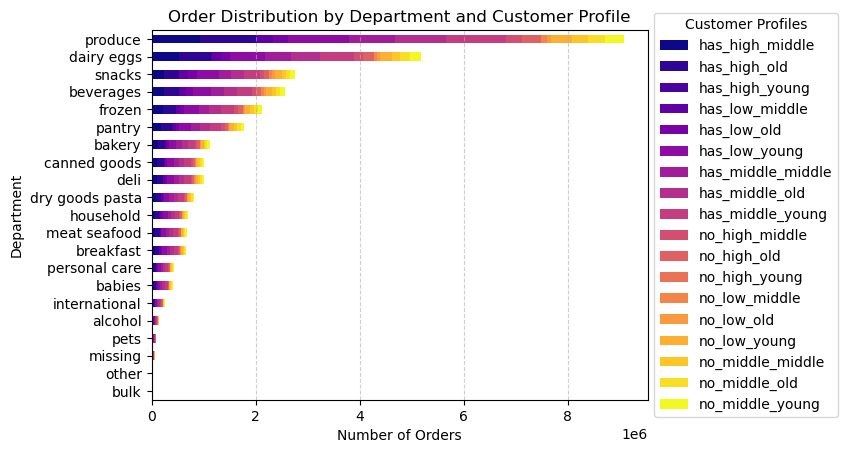

In [80]:
# Calculate the total order counts for each department
total_order_counts = pivot_profiles_dept.sum(axis=1)

# Sort the DataFrame by total order counts in descending order
sorted_df = pivot_profiles_dept.loc[total_order_counts.sort_values(ascending=False).index]

# Create clustered bar chart by department and profile
bar_profiles_dept = sorted_df.plot.barh(stacked=True, cmap='plasma')

# Add labels and a title
bar_profiles_dept.set(xlabel='Number of Orders', ylabel='Department', title='Order Distribution by Department and Customer Profile')

# Move the legend outside the plot for better visibility
bar_profiles_dept.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Customer Profiles')

# Add grid lines for better readability
bar_profiles_dept.grid(axis='x', linestyle='--', alpha=0.6)

# Invert the y-axis for a top-down representation of departments
bar_profiles_dept.invert_yaxis()

# Show the plot
plt.show()

In [81]:
# Export the barplot

bar_profiles_dept.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Order_Distribution_by_Department_and_Customer_Profile.png'), bbox_inches='tight')

### For region

##### age by region

In [82]:
# Create a crosstab to act as a pivot for analysis

pivot_age_region = pd.crosstab(df['region'], df['age_flag'], dropna = False)


# View results of crosstab creation

pivot_age_region

age_flag,middle (40-59),old (60+),young (18-39)
region,,,
Midwest,2323069,2455443,2483001
Northeast,1708719,1884229,1871737
South,3181471,3521421,3608247
West,2511691,2713411,2702125


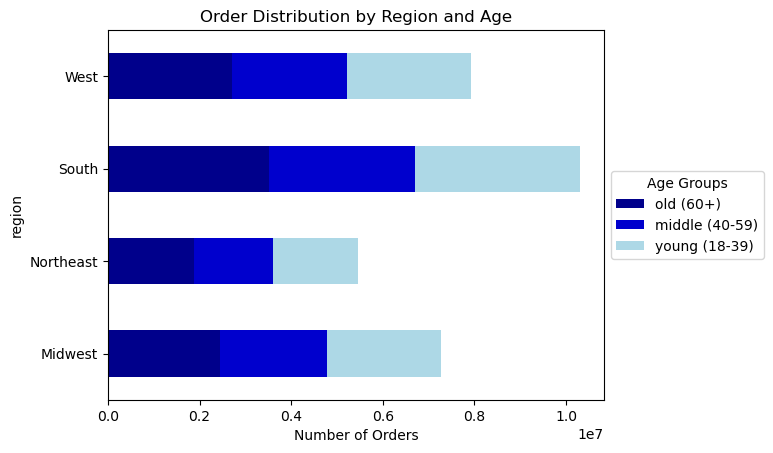

In [83]:
pivot_age_region_reordered = pivot_age_region[['old (60+)', 'middle (40-59)', 'young (18-39)']]

# Define a dictionary to map each age group to a specific color
profile_colors = {
    'young (18-39)': 'lightblue',
    'middle (40-59)': 'mediumblue',
    'old (60+)': 'darkblue',}


# Create clustered bar chart by region and agee with custom colors
bar_age_region = pivot_age_region_reordered.plot.barh(stacked=True, color=[profile_colors[col] for col in pivot_age_region_reordered.columns])


# Add labels and a title and put titled legend next to chart

bar_age_region.set(xlabel='Number of Orders', title='Order Distribution by Region and Age')
bar_age_region.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Age Groups')

In [84]:
# Export the barplot

bar_age_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Order_Distribution_by_Region_and_Age.png'), bbox_inches='tight')

##### dependants by region

In [85]:
# Create a crosstab to act as a pivot for analysis

pivot_dependants_region = pd.crosstab(df['region'], df['dependants_flag'], dropna = False)


# View results of crosstab creation

pivot_dependants_region

dependants_flag,has dependants,no dependants
region,,
Midwest,5438697,1822816
Northeast,4110203,1354482
South,7729206,2581933
West,5946777,1980450


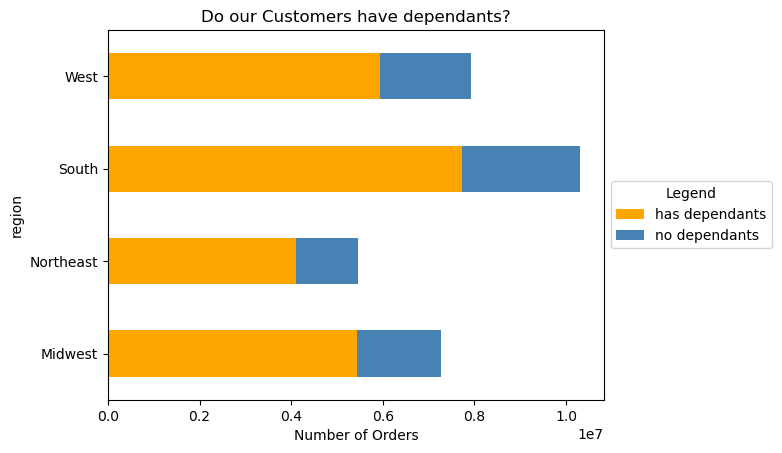

In [86]:
# Create clustered bar chart by region and agee with custom colors
bar_dependants_region = pivot_dependants_region.plot.barh(stacked=True)


# Add labels and a title and put titled legend next to chart

bar_dependants_region.set(xlabel='Number of Orders', title='Do our Customers have dependants?')
bar_dependants_region.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Legend')

In [87]:
# Export the barplot

bar_dependants_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dependants_by_Region.png'), bbox_inches='tight')

##### income by region

In [88]:
# Create a crosstab to act as a pivot for analysis

pivot_income_region = pd.crosstab(df['region'], df['income_flag'], dropna = False)


# View results of crosstab creation

pivot_income_region

income_flag,high_income,low_income,middle_income
region,,,
Midwest,2189106,1974266,3098141
Northeast,1628878,1486808,2348999
South,3023493,2849538,4438108
West,2338306,2209921,3379000


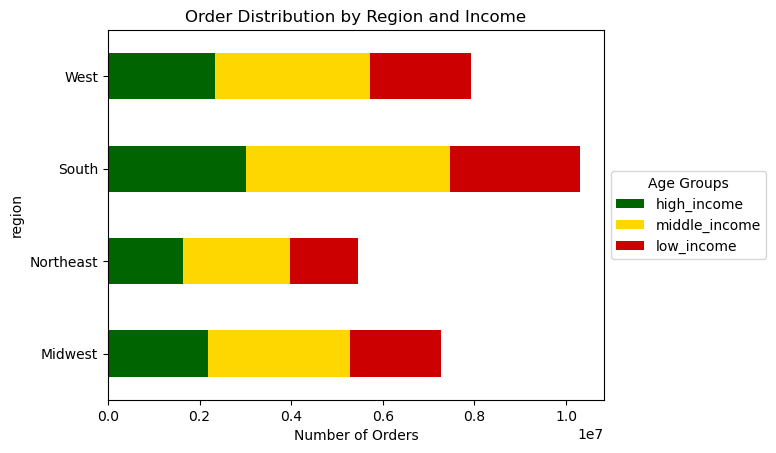

In [89]:
# Create clustered bar chart by region and Income

pivot_income_region_reordered = pivot_income_region[['high_income', 'middle_income', 'low_income']]

# Define a dictionary to map each age group to a specific color
profile_colors = {
    'low_income': '#CD0000',
    'middle_income': '#FFD700',
    'high_income': 'darkgreen',}


# Create clustered bar chart by region and agee with custom colors
bar_income_region = pivot_income_region_reordered.plot.barh(stacked=True, color=[profile_colors[col] for col in pivot_income_region_reordered.columns])


# Add labels and a title and put titled legend next to chart

bar_income_region.set(xlabel='Number of Orders', title='Order Distribution by Region and Income')
bar_income_region.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Age Groups')

In [90]:
# Export the barplot

bar_income_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Income_by_Region.png'), bbox_inches='tight')

##### loyalty by region

In [91]:
# Create a crosstab to act as a pivot for analysis

pivot_loyalty_region = pd.crosstab(df['region'], df['loyalty_flag'], dropna = False)


# View results of crosstab creation

pivot_loyalty_region

loyalty_flag,Loyal customer,New Customer,Regular customer
region,,,
Midwest,2373774,1136761,3750978
Northeast,1841785,842156,2780744
South,3405844,1593664,5311631
West,2662690,1231114,4033423


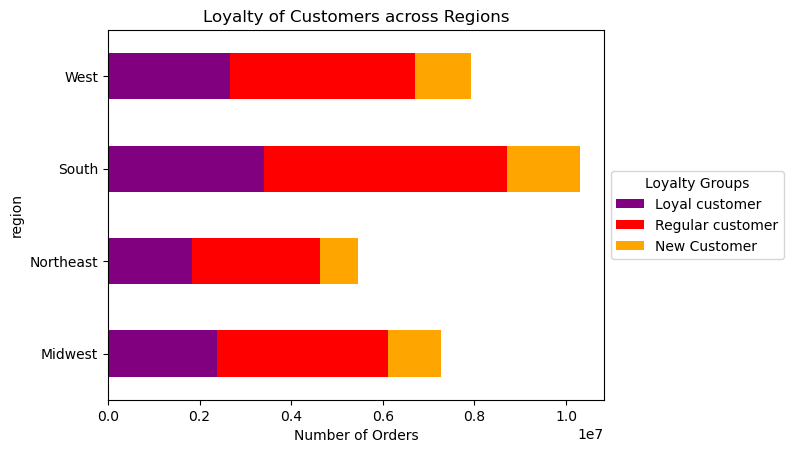

In [92]:
# Create clustered bar chart by region and loyalty

pivot_loyalty_region_reordered = pivot_loyalty_region[['Loyal customer', 'Regular customer', 'New Customer']]

# Define a dictionary to map each age group to a specific color
profile_colors = {
    'Loyal customer': 'purple',
    'Regular customer': 'red',
   'New Customer': 'orange',}


# Create clustered bar chart by region and agee with custom colors
bar_loyalty_region = pivot_loyalty_region_reordered.plot.barh(stacked=True, color=[profile_colors[col] for col in pivot_loyalty_region_reordered.columns])


# Add labels and a title and put titled legend next to chart

bar_loyalty_region.set(xlabel='Number of Orders', title='Loyalty of Customers across Regions')
bar_loyalty_region.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Loyalty Groups')

In [93]:
# Export the barplot

bar_loyalty_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Loyalty_of_Customers_by_region.png'), bbox_inches='tight')

### Plots

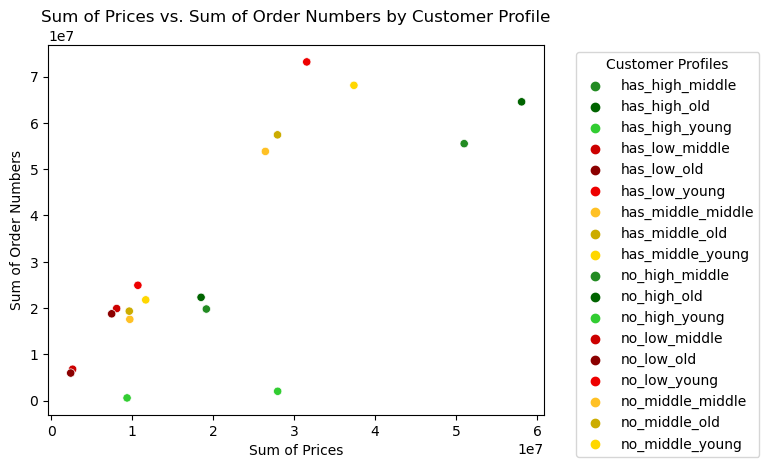

In [94]:
# Create a DataFrame with the sum of 'prices' and 'order_number' for each 'customer_profile'
summary_df = df.groupby('customer_profile').agg({'prices': 'sum', 'order_number': 'sum'}).reset_index()

# Create a scatter plot with custom colors
scatter_plot = sns.scatterplot(
    x='prices', 
    y='order_number', 
    hue='customer_profile', 
    data=summary_df, 
    palette=df.set_index('customer_profile')['profile_colors'].to_dict()  # Use the 'profile_colors' column as palette
)

# Add labels and a title
scatter_plot.set(
    xlabel='Sum of Prices', 
    ylabel='Sum of Order Numbers', 
    title='Sum of Prices vs. Sum of Order Numbers by Customer Profile'
)

# Move the legend outside the plot for better visibility
plt.legend(title='Customer Profiles', bbox_to_anchor=(1.05, 1), loc='upper left')


# Show the plot
plt.show()

In [95]:
# Export the barplot

scatter_plot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Revenues_and_Orders_by_Customer_Profile'), bbox_inches='tight')


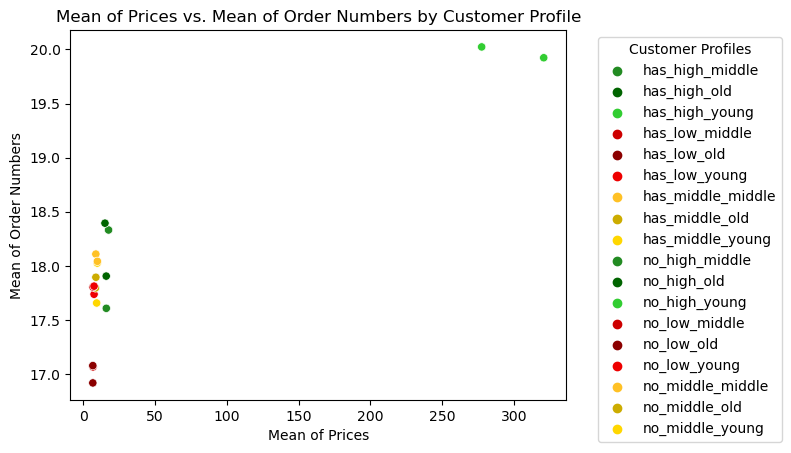

In [99]:
# Create a DataFrame with mean 'prices' and 'order_number' for each 'customer_profile'
summary_df1 = df.groupby('customer_profile').agg({'prices': 'mean', 'order_number': 'mean'}).reset_index()

# Create a scatter plot with custom colors
scatter_plot1 = sns.scatterplot(
    x='prices', 
    y='order_number', 
    hue='customer_profile', 
    data=summary_df1, 
    palette=df.set_index('customer_profile')['profile_colors'].to_dict()  # Use the 'profile_colors' column as palette
)

# Add labels and a title
scatter_plot1.set(
    xlabel='Mean of Prices', 
    ylabel='Mean of Order Numbers', 
    title='Mean of Prices vs. Mean of Order Numbers by Customer Profile'
)

# Move the legend outside the plot for better visibility
plt.legend(title='Customer Profiles', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

In [100]:
# Export the barplot

scatter_plot1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Loyalty_of_Customers_by_region.png'), bbox_inches='tight')